### Gradient Descent -

In [1]:
import numpy as np
def gd(x,y):
    m = c = 0
    lr = 0.01
    n = len(x)
    for i in range(100):
        yp = m*x+c
        cost = (1/n) * sum([j**2 for j in (y-yp)])
        md = -(2/n) * sum(x*(y-yp))
        cd = -(2/n) * sum(y-yp)
        m = m - lr * md
        c = c - lr * cd
        print("m = ",m," & ","c = ",c,"cost = ",cost,"iteration = ",i)


In [2]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([2,4,6,8,10,12,14,16,18,20])

In [3]:
gd(x,y)

m =  1.54  &  c =  0.22 cost =  154.0 iteration =  0
m =  1.87  &  c =  0.2662 cost =  7.081799999999998 iteration =  1
m =  1.940818  &  c =  0.275176 cost =  0.3408464399999985 iteration =  2
m =  1.9561187800000002  &  c =  0.2761825 cost =  0.03142830589800044 iteration =  3
m =  1.9595272444  &  c =  0.2754857842 cost =  0.017099414381603204 iteration =  4
m =  1.96038782995  &  c =  0.27442807163199995 cost =  0.016310752244585888 iteration =  5
m =  1.9607021130089801  &  c =  0.27329684890485995 cost =  0.01614443527857366 iteration =  6
m =  1.960898832612531  &  c =  0.27215367949577496 cost =  0.016007763100830928 iteration =  7
m =  1.961069826756347  &  c =  0.271011734318481 cost =  0.015873532621130646 iteration =  8
m =  1.961234769378927  &  c =  0.26987381868891325 cost =  0.015740486657478563 iteration =  9
m =  1.9613978769013727  &  c =  0.26874051768345303 cost =  0.01560855853955899 iteration =  10
m =  1.961560054742136  &  c =  0.26761194087063295 cost =  0.015

### ANN Implementation - 

In [4]:
import tensorflow as tf # tensorflow is the library which is used to do the mathematical calculations in machine learning
from tensorflow import keras # Keras is a python embedded api which is used to implement deep learning networks .
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [6]:
print(len(X_train)) # 60000 images are present in X_train.
len(X_test)

60000


10000

In [7]:
X_train[0].shape

(28, 28)

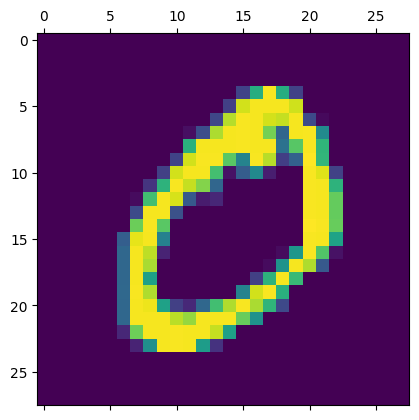

In [8]:
plt.matshow(X_train[1])  # mnist is digit image data

In [9]:
# Preprocessing step -
X_train = X_train / 255 # X_train aur X_test mein actual image ke pixel values present hai .
X_test = X_test / 255 # 0 to 255 highest value is 255

In [10]:
X_train_flattend = X_train.reshape(len(X_train),28*28) # reshaping step to convert pixel values from two dimensional data to single dimensional data.
X_test_flattend = X_test.reshape(len(X_test),28*28)

In [11]:
model1 = keras.Sequential([                # with the help of keras library we can make structures of deep neural network and using sequential model to define in our network the stack of layers
    keras.layers.Dense(10,input_dim=(784),activation='sigmoid') # 10 --> define karta ki output layers mein kitne neuron hone chaiye
])    # activation function output layers mein kaun sa lagana chaiye .
# Basic structure of ANN is built above and without hidden layers the output contains 10 neurons and input contains 784 neurons with activation function applied sigmoid 
# to the output layers.

c:\Users\user\miniconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# compiling the above structure 
model1.compile(optimizer='sgd',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
# small data use sgd and loss category should be mentioned metrics is used to judge the model performance.

In [13]:
# Now training the neural network -
model1.fit(X_train_flattend,y_train,epochs=5) # epoch is given 

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7093 - loss: 1.1415
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8796 - loss: 0.4724
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8899 - loss: 0.4119
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8945 - loss: 0.3860
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8993 - loss: 0.3632


In [14]:
model1.evaluate(X_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8927 - loss: 0.3839


[0.335749089717865, 0.9074000120162964]

In [15]:
predicted = model1.predict(X_test_flattend)
predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([0.41268763, 0.00310747, 0.47534478, 0.85580605, 0.15557545,
       0.24647973, 0.01402952, 0.9997145 , 0.43567017, 0.9295343 ],
      dtype=float32)

In [16]:
# which image is maximum equal or matching with test image can be find -
np.argmax(predicted[0]) # final prediction of our model 

7

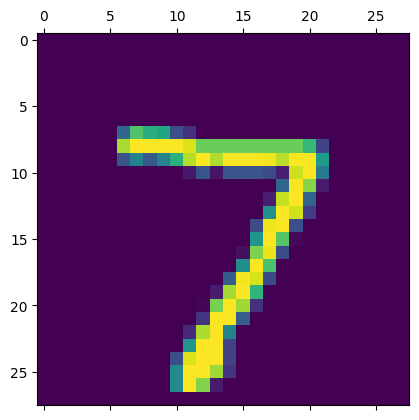

In [17]:
plt.matshow(X_test[0])

In [18]:
# Now building again one ANN model using hidden layer concept -
model2 = keras.Sequential([
    keras.layers.Dense(300,input_dim=(784),activation='relu'), # Here 300 is number of neurons in the hidden layer 1 and hidden layer neuron mein relu lagega aur sirf ek hidden layer hogi ussme 300 neurons hai 
    keras.layers.Dense(10,activation='sigmoid') # output layers description
])

In [19]:
# compiling the above structure 
model2.compile(optimizer='sgd',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [20]:
model1.fit(X_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9013 - loss: 0.3505
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9056 - loss: 0.3414
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9078 - loss: 0.3320
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9084 - loss: 0.3264
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9112 - loss: 0.3197


In [21]:
model1.evaluate(X_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9041 - loss: 0.3503


[0.30644044280052185, 0.9161999821662903]

In [22]:
model3 = keras.Sequential([
    keras.layers.Dense(300,input_dim=(784),activation='relu'), # Hidden  layer 1 
    keras.layers.Dense(200,activation='relu'), # Hidden layer 2
    keras.layers.Dense(10,activation='sigmoid')
])

In [23]:
model3.compile(optimizer='sgd',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model3.fit(X_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7340 - loss: 0.9972
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9153 - loss: 0.2994
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9333 - loss: 0.2356
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9421 - loss: 0.2021
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9525 - loss: 0.1674


In [24]:
model3.evaluate(X_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9431 - loss: 0.1866


[0.16061678528785706, 0.9517999887466431]

In [25]:
model4 = keras.Sequential([
    keras.layers.Dense(300,input_dim=(784),activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [26]:
model4.compile(optimizer='sgd',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model4.fit(X_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7366 - loss: 0.9781
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9218 - loss: 0.2674
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9406 - loss: 0.2040
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9521 - loss: 0.1661
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9604 - loss: 0.1377


In [27]:
model4.evaluate(X_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9541 - loss: 0.1547


[0.13378123939037323, 0.9596999883651733]

In [28]:
model5 = keras.Sequential([
    keras.layers.Dense(300,input_dim=(784),activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [29]:
model5.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [30]:
model5.fit(X_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.8877 - loss: 0.3644
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9719 - loss: 0.0917
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9795 - loss: 0.0642
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step - accuracy: 0.9852 - loss: 0.0466
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9869 - loss: 0.0397


In [31]:
model6 = keras.Sequential([
    keras.layers.Dense(300,input_dim=(784),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


1.  Dense Layer (Hidden Layer):
   - Number of Neurons: 300
   - Input Dimension: 784
   - Activation Function: ReLU (Rectified Linear Unit)
   - Description: This is the first hidden layer in the neural network. It consists of 300 neurons, each connected to every input node in the input layer. The input dimension is specified as 784, which indicates that the input layer has 784 nodes. The activation function used in this layer is ReLU, which introduces non-linearity to the model.

2. Dense Layer (Output Layer):
   - Number of Neurons: 10
   - Activation Function: Sigmoid
   - Description: This is the output layer of the neural network. It consists of 10 neurons, each representing one of the output classes. The activation function used in this layer is Sigmoid, which is commonly used for binary classification problems. It squashes the output values to the range [0, 1], which can be interpreted as probabilities.

Overall, this model architecture has two layers: one hidden layer with 300 neurons and a ReLU activation function, and one output layer with 10 neurons and a sigmoid activation function. The model is designed for tasks such as classification, where the input consists of 784 features and the output consists of 10 classes.

In [32]:
model6.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [33]:
model6.fit(X_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8934 - loss: 0.3663
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9734 - loss: 0.0914
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9818 - loss: 0.0593
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9872 - loss: 0.0403
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9920 - loss: 0.0279


There is a myth that the hidden layers increase and the accuracy also increased.

In [34]:
predicted = model5.predict(X_test_flattend) # 313 is number of samples (In batches of 32) == 60000

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [35]:
predicted[1]

array([3.95306647e-02, 9.94099677e-01, 1.00000000e+00, 9.68636274e-01,
       1.09225235e-04, 1.60540699e-03, 4.92309653e-07, 2.17088893e-01,
       5.99622763e-05, 2.10754897e-05], dtype=float32)

In [36]:
np.argmax(predicted[1])

2

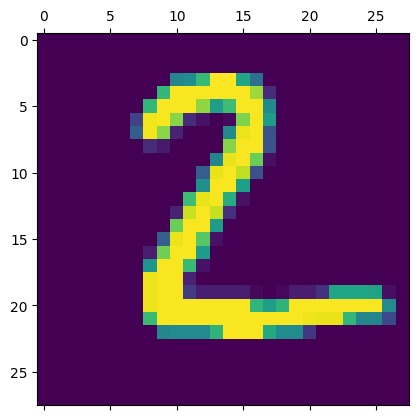

In [37]:
plt.matshow(X_test[1])

### More Implementation on ANN (practice)

In [ ]:
model7 = keras.Sequential([
    keras.layers.Dense(300,input_dim=(784),activation='relu')
    keras.layers.Dense(20)
])